In [1]:
import keras
from keras import layers
import numpy as np
from keras import backend as K
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from model import *
import importlib
import drawing
importlib.reload(drawing)
from drawing import *
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
plt.rcParams['font.sans-serif'] = ["Arial"]

In [2]:
df = pd.read_excel(r"fingerprints.xlsx",sheet_name="MACCS")
df_ecfp=pd.read_excel(r"fingerprints.xlsx",sheet_name="ECFP")
df_fp2=pd.read_excel(r"fingerprints.xlsx",sheet_name="FP2")
data_df = df.drop(columns=["IUPAC Name","No","label"]) #Maccs
data_df_ecfp = df_ecfp.drop(columns=["IUPAC Name","No","label"])
data_df_fp2 = df_fp2.drop(columns=["IUPAC Name","No","label"])
label_array=df["label"].to_numpy()

data_df_array = data_df.to_numpy()
data_df_ecfp_array=data_df_ecfp.to_numpy()
data_df_fp2_array=data_df_fp2.to_numpy()
label_array=np.where(label_array == 'good', 1, 0).astype('float32')

In [3]:
labels=label_array
labels_series = pd.Series(labels)
label_array = pd.get_dummies(labels_series)
label_array=label_array.values

In [4]:
data_array= result = np.column_stack((label_array,data_df_array, data_df_ecfp_array,data_df_fp2_array))

In [5]:
print(label_array)
X1, X2, X3, y = data_df_array, data_df_ecfp_array, data_df_fp2_array, label_array

[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]


In [8]:
i=2

file1_path = './dataset/cross_validation_fold_%d/ECFP_train_data_%d.csv'% (i, i)
file2_path = './dataset/cross_validation_fold_%d/ECFP_valid_data_%d.csv'% (i, i)

def read_csv_to_list_of_lists(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            numbers = list(map(int, filter(None, line.strip().split(','))))
            data.append(numbers)
    return data


list_of_lists_1 = read_csv_to_list_of_lists(file1_path)
list_of_lists_2 = read_csv_to_list_of_lists(file2_path)
list_of_lists=list_of_lists_1+list_of_lists_2

In [11]:
X1 = vector1_sorted
X2 = vector2_sorted
X3 = vector3_sorted
y = vector4_sorted

MACCS_train = X1[:-8]
ECFP_train = X2[:-8]
FP2_train = X3[:-8]
train_label = y[:-8]

MACCS_valid = X1[-8:]
ECFP_valid = X2[-8:]
FP2_valid = X3[-8:]
valid_label = y[-8:]

In [12]:
batch_size=8
epochs=200
early_stoppong_patience= 10
num_folds = 10
lr=1e-3

Epoch 1/200
16/16 [==============================] - 1s 16ms/step - loss: 0.7056 - accuracy: 0.4435 - val_loss: 0.6295 - val_accuracy: 1.0000
Epoch 2/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6570 - accuracy: 0.6290 - val_loss: 0.6197 - val_accuracy: 0.8750
Epoch 3/200
16/16 [==============================] - 0s 3ms/step - loss: 0.6128 - accuracy: 0.7581 - val_loss: 0.5872 - val_accuracy: 0.8750
Epoch 4/200
16/16 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.8790 - val_loss: 0.5734 - val_accuracy: 0.7500
Epoch 5/200
16/16 [==============================] - 0s 3ms/step - loss: 0.4820 - accuracy: 0.9032 - val_loss: 0.5168 - val_accuracy: 0.7500
Epoch 6/200
16/16 [==============================] - 0s 3ms/step - loss: 0.4075 - accuracy: 0.9113 - val_loss: 0.4448 - val_accuracy: 0.8750
Epoch 7/200
16/16 [==============================] - 0s 3ms/step - loss: 0.3321 - accuracy: 0.9113 - val_loss: 0.4275 - val_accuracy: 0.8750
Epoch 8/200


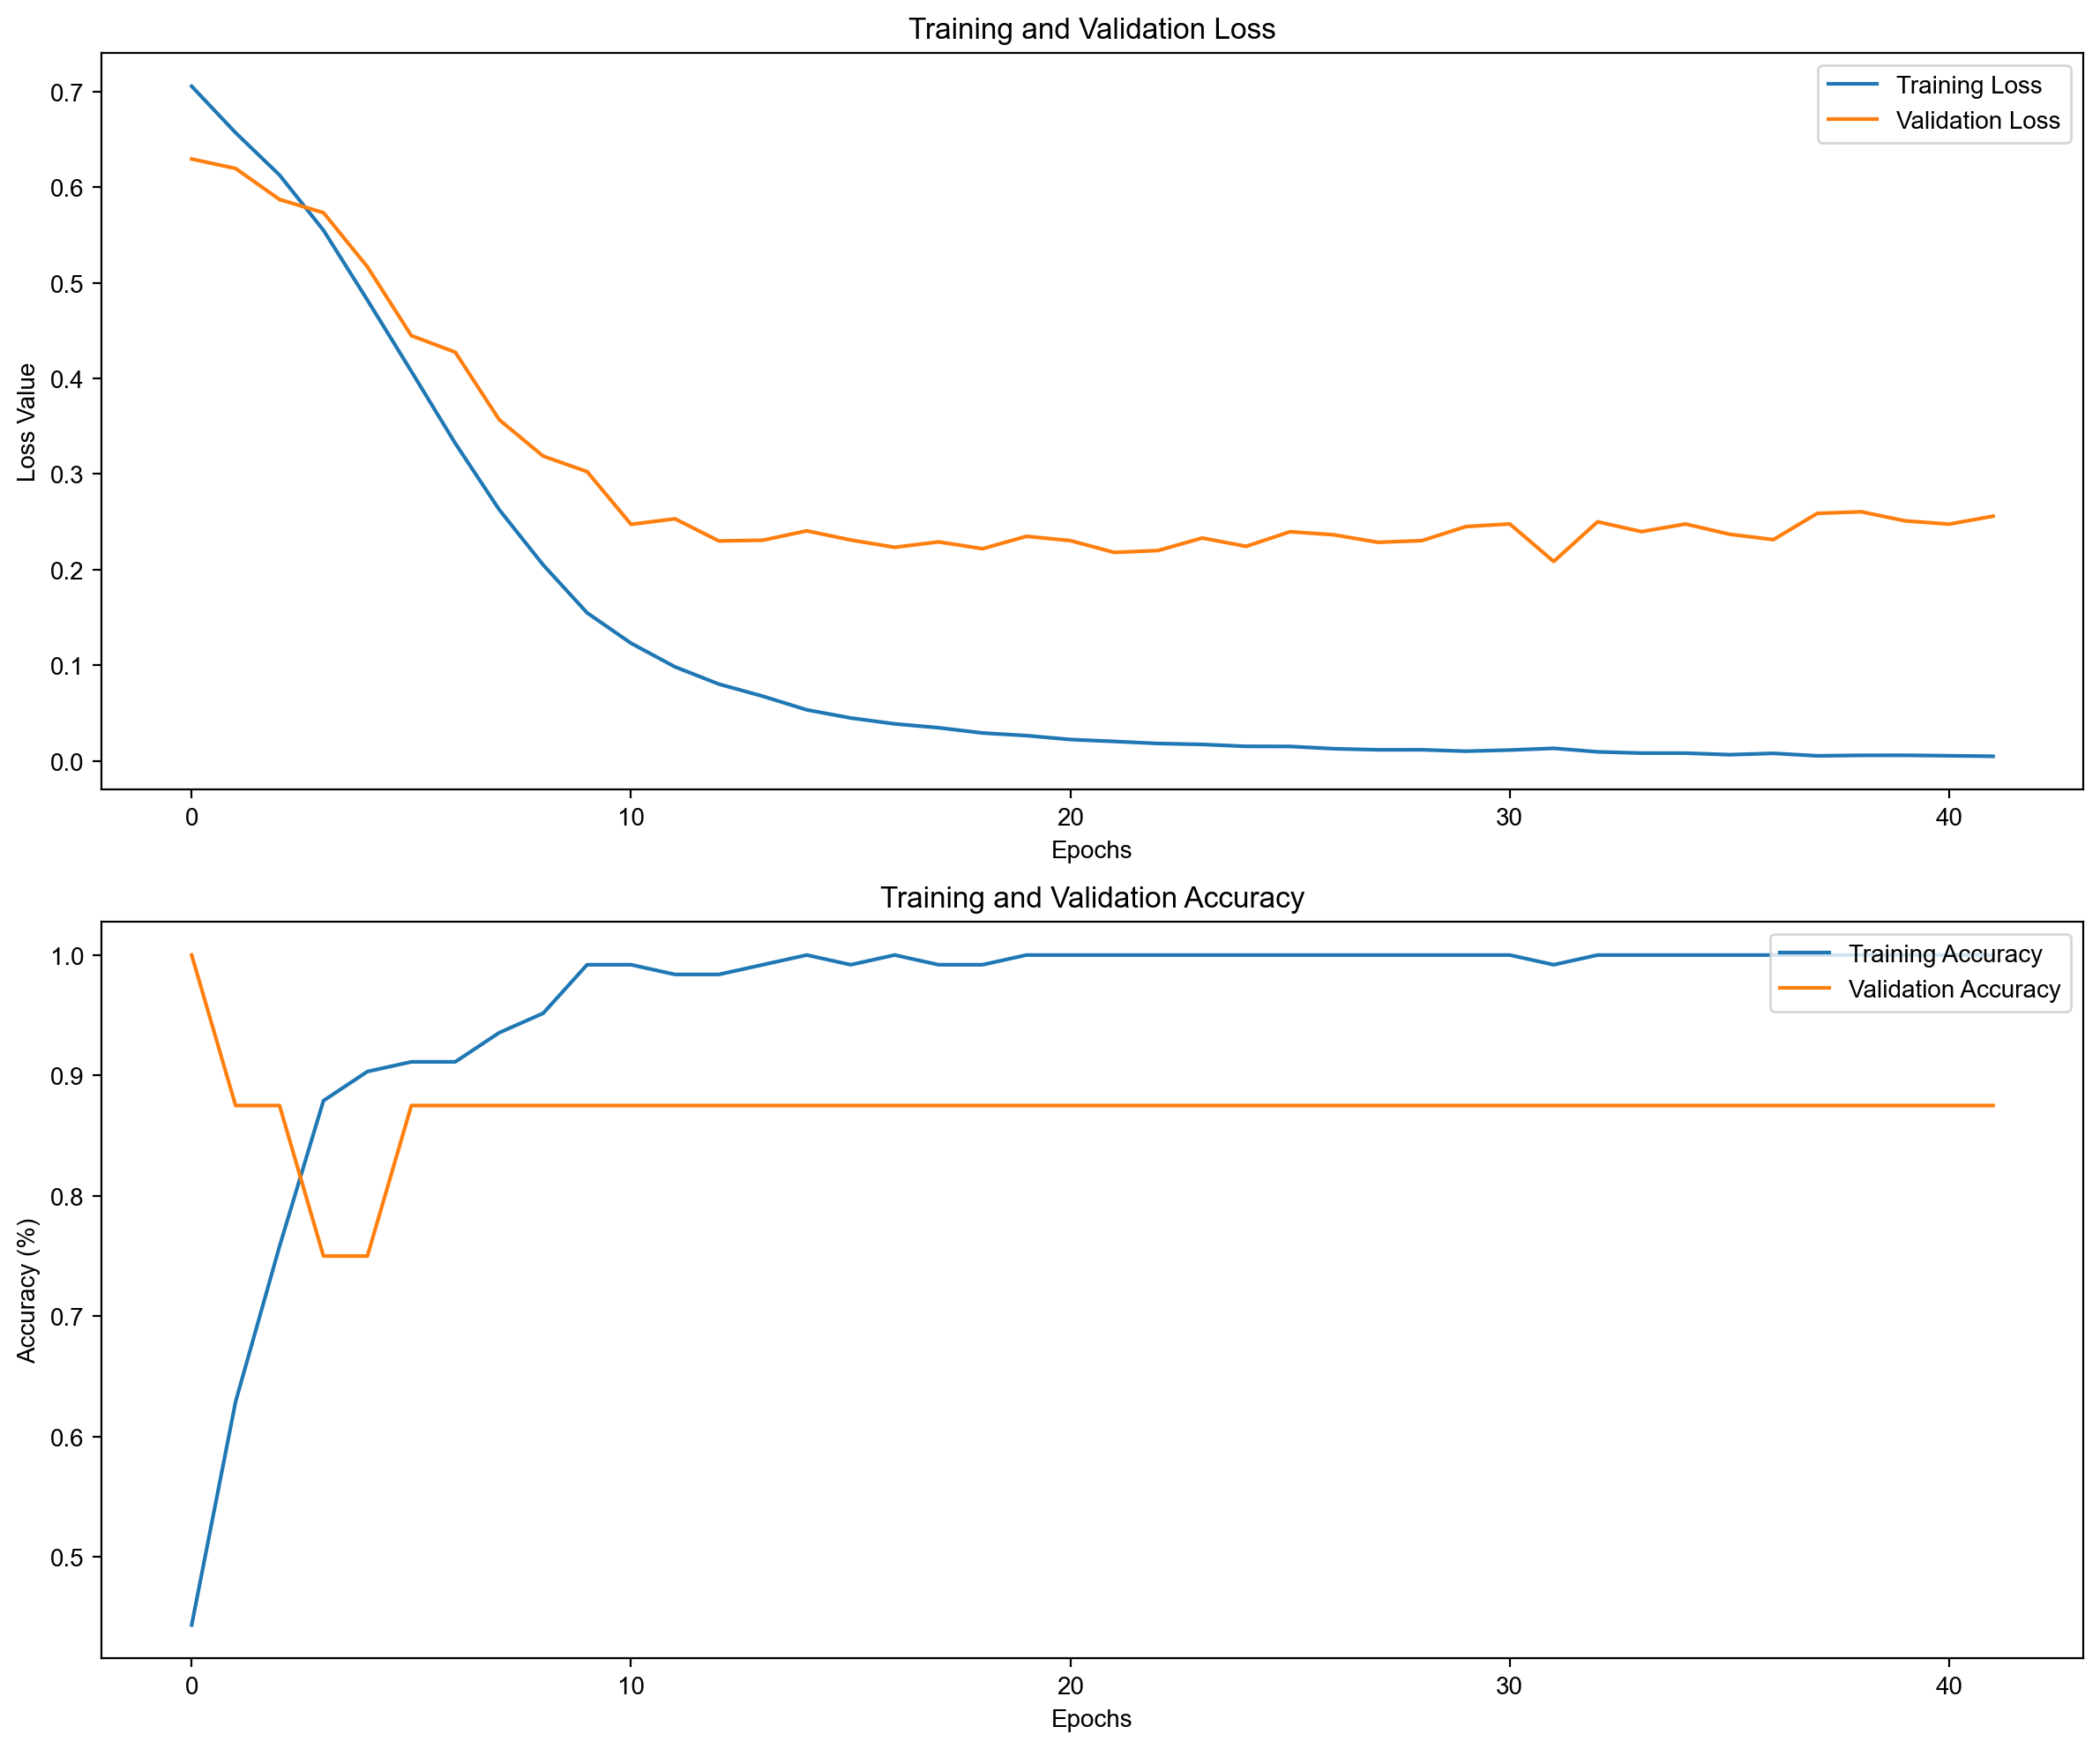

In [13]:
model_classifier = create_model()

model_classifier.compile(optimizer=tf.keras.optimizers.Adam(lr),
                         loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=early_stoppong_patience)

history = model_classifier.fit([MACCS_train, ECFP_train, FP2_train], train_label, epochs=epochs,
                               batch_size=batch_size, validation_data=([MACCS_valid, ECFP_valid, FP2_valid], valid_label),
                               callbacks=[early_stopping])
print(f"Training was stopped at epoch {early_stopping.stopped_epoch}.")
stopping_epoch=early_stopping.stopped_epoch+1

print(history.history.keys())

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(stopping_epoch)
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss Value') 

plt.subplot(2, 1, 2)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy (%)') 

plt.tight_layout() 
plt.show()


In [16]:
indices = np.random.permutation(MACCS_train.shape[0])
print(indices)

MACCS_train = MACCS_train[indices]
ECFP_train = ECFP_train[indices]
FP2_train = FP2_train[indices]
train_label = train_label[indices]

indices_valid = np.random.permutation(MACCS_valid.shape[0])
print(indices_valid )

MACCS_valid = MACCS_valid[indices_valid]
ECFP_valid = ECFP_valid[indices_valid]
FP2_valid =FP2_valid[indices_valid]
valid_label = valid_label[indices_valid]

[ 17  25  56  49  57  30 120 113  58  65 102  11   5  88   0   8  50  23
  79 111   2  46  44  36  90  13  40 101  15 103  68   7  82 107 106  34
  20  96  53  86  67  42  35  61  32  18  91  93  29  12  38  66 115 118
 119   3  39  43  85 110  80 104  24  74  62  69  94  64   6 108  98  22
  47  84  54  33   1  70  14  16  52 105  97  72  99  51  73  41  45 114
   9  60  28  26 100  71  89  27  87  10  21  77  92 116 117  63  31  76
   4 112  81  48  83 109  95  37 122  59  75  55  19 121  78 123]
[0 1 3 4 2 7 5 6]


In [18]:
X1, X2, X3, y = data_df_array, data_df_ecfp_array, data_df_fp2_array, label_array

In [19]:
indices = np.random.permutation(X1.shape[0])

X1 = X1[indices]
X2 = X2[indices]
X3 = X3[indices]
y = y[indices]

In [20]:
num_folds = num_folds
kfold = KFold(n_splits=num_folds, shuffle=True,random_state=1)

acc_per_fold = []
loss_per_fold = []
val_acc_per_fold = []
val_loss_per_fold = []

fold_no = 1

In [21]:
for train, test in kfold.split(X1, y):
    print(f"\n这是第{fold_no}折")
    print(train)
    print(test)
    print(label_array[test])
    model_classifier = create_model()
    
    model_classifier.compile(optimizer=tf.keras.optimizers.Adam(lr),
                             loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=100)
    
    history = model_classifier.fit([X1[train], X2[train], X3[train]], y[train], epochs=25,
                                   batch_size=batch_size, validation_data=([X1[test], X2[test], X3[test]], y[test]), 
                                   callbacks=[early_stopping])

    print(history.history.keys())
    acc_per_fold.append(history.history['accuracy'])
    loss_per_fold.append(history.history['loss'])
    val_acc_per_fold.append(history.history['val_accuracy'])
    val_loss_per_fold.append(history.history['val_loss'])

    fold_no += 1





这是第1折
[  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  52  53  55  56  57  58  59
  60  61  62  63  64  65  67  68  70  71  72  73  74  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 115 116 117
 118 122 123 124 125 126 127 128 130 131]
[  5  17  35  36  51  54  66  69  75 114 119 120 121 129]
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 1]]
Epoch 1/25
15/15 [==============================] - 1s 15ms/step - loss: 0.7047 - accuracy: 0.4661 - val_loss: 0.6931 - val_accuracy: 0.6429
Epoch 2/25
15/15 [==============================] - 0s 5ms/step - loss: 0.6523 - accuracy: 0.7119 - val_loss: 0.6844 - val_accuracy: 0.6429
Epoch 3/25
15/15 [==============================] - 0s 3ms/step - loss: 0.6

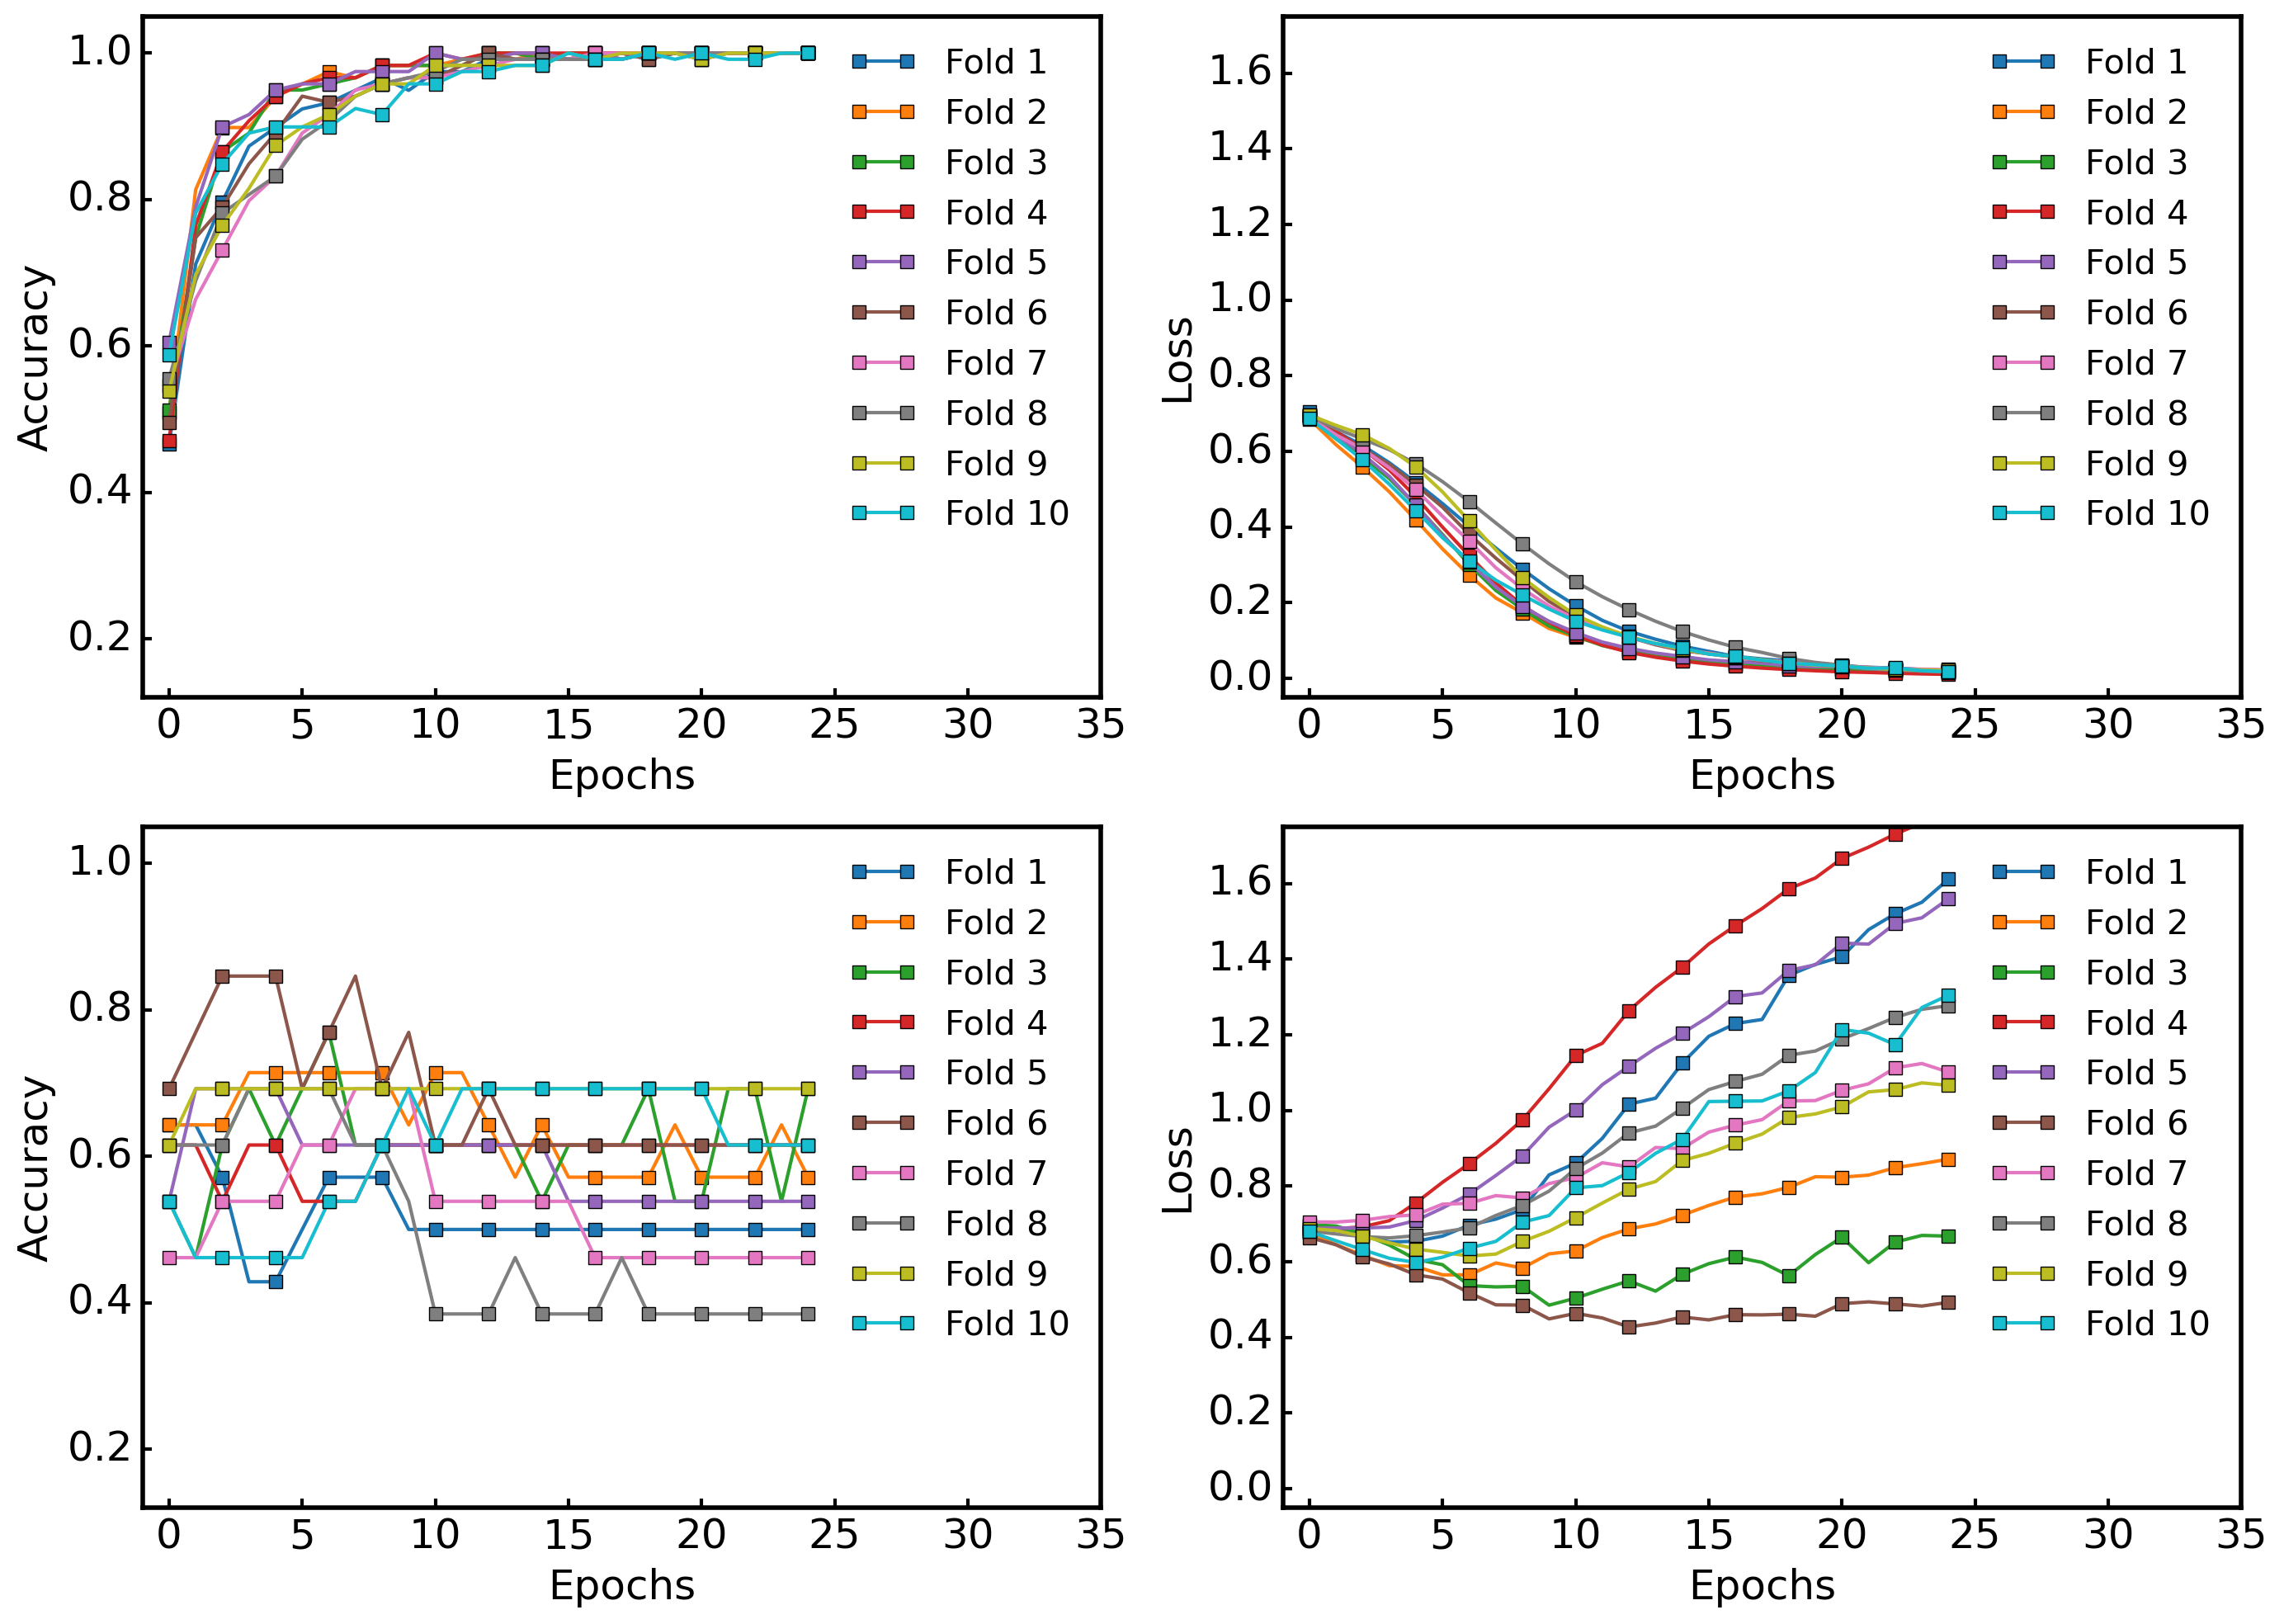

In [24]:
importlib.reload(drawing)
from drawing import *

capture_training(num_folds,acc_per_fold,loss_per_fold,val_acc_per_fold,val_loss_per_fold)